In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("E:\DS Assignments1\\my_movies.csv")

In [3]:
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


As the data is not in transaction formation, We are using transaction Encoder.

In [4]:
df=pd.get_dummies(data)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Apriori Algorithm

In [5]:
frequent_itemsets = apriori(df,min_support=0.05,max_len=2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
121,0.4,"(V3_Sixth Sense, V2_Patriot)"
122,0.1,"(V3_Gladiator, V4_Green Mile)"
123,0.1,"(V4_Green Mile, V3_Harry Potter1)"
124,0.1,"(V5_LOTR2, V3_Harry Potter1)"


In [6]:
rule1=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
185,(V3_Harry Potter1),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
186,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
187,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
188,(V5_LOTR2),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


<AxesSubplot:xlabel='support', ylabel='lift'>

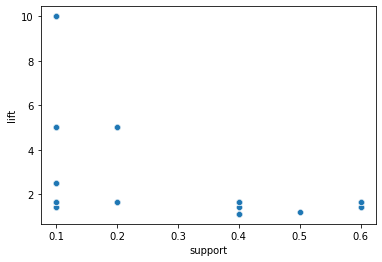

In [7]:
support1=pd.Series(rule1.support)
lift1=pd.Series(rule1.lift)
sns.scatterplot(x=support1,y=lift1)

In [8]:
#increasing the support value and lift

In [9]:
frequent_set2=apriori(df,min_support=0.1,max_len=2,use_colnames=True)
frequent_set2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
121,0.4,"(V3_Sixth Sense, V2_Patriot)"
122,0.1,"(V3_Gladiator, V4_Green Mile)"
123,0.1,"(V4_Green Mile, V3_Harry Potter1)"
124,0.1,"(V5_LOTR2, V3_Harry Potter1)"


In [10]:
rule2=association_rules(frequent_set2,metric='lift',min_threshold=1)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
185,(V3_Harry Potter1),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
186,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
187,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
188,(V5_LOTR2),(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

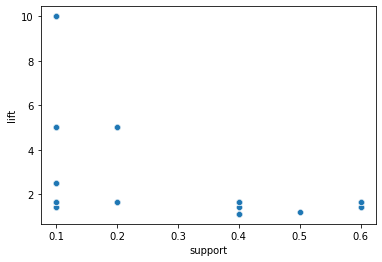

In [11]:
sns.scatterplot(rule2.support,rule2.lift)

In [12]:
frequent_itemsets3=apriori(df,min_support=0.12,max_len=2,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.6,(V1_Gladiator)
8,0.2,(V1_Sixth Sense)
9,0.6,(V2_Patriot)


In [13]:
rule3=association_rules(frequent_itemsets3,metric='lift',min_threshold=1.5)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(V1_Sixth Sense),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
5,(Sixth Sense),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6,(V4_Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Sixth Sense),(V4_Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

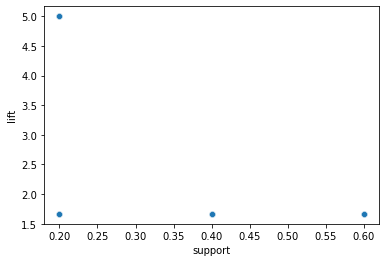

In [14]:

sns.scatterplot(rule3.support,rule3.lift)